数据源来源网址太慢，切换本地数据源

In [1]:
import pandas as pd

In [2]:
bikes_hour_df_row=pd.read_csv("hour.csv")

In [3]:
bikes_day_df_row=pd.read_csv("day.csv")

In [4]:
bikes_hour_df_row.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [5]:
bikes_hour_df = bikes_hour_df_row.drop(['casual','registered'],axis=1)

In [6]:
bikes_hour_df['cnt'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt, dtype: float64

In [7]:
import matplotlib.pyplot  as plt

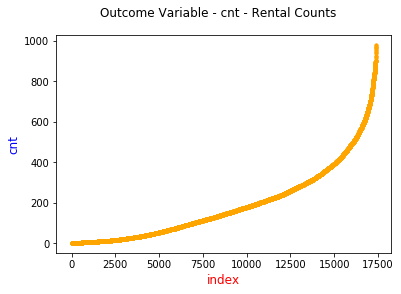

In [8]:
fig,ax = plt.subplots(1)
ax.plot(sorted(bikes_hour_df['cnt']),color='orange',marker='.')
ax.set_xlabel("index",fontsize='12',color='red')
ax.set_ylabel("cnt",fontsize='12',color='blue')
fig.suptitle("Outcome Variable - cnt - Rental Counts")
plt.show()


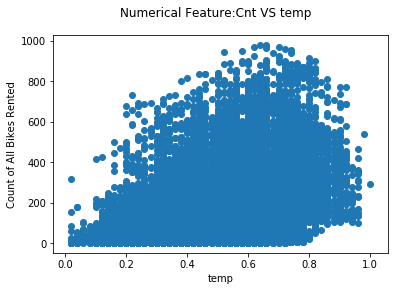

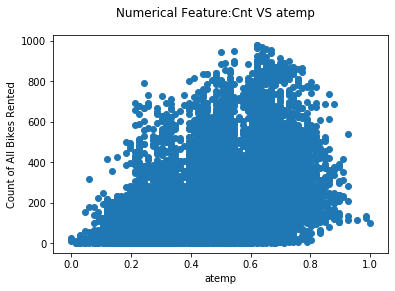

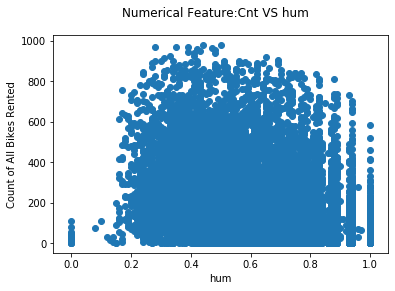

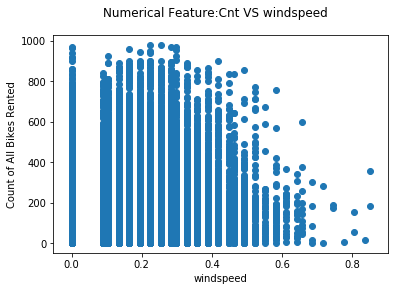

In [9]:
counter_=0
for tp in bikes_hour_df.dtypes:
    if tp =="float64":
        bikes_hour_df = bikes_hour_df.sort_values(bikes_hour_df.dtypes.index[counter_])
        feature = bikes_hour_df.dtypes.index[counter_]
        plt.scatter(bikes_hour_df[feature],bikes_hour_df['cnt'])
        plt.suptitle("Numerical Feature:Cnt VS " + feature)
        plt.xlabel(feature)
        plt.ylabel("Count of All Bikes Rented")
        plt.show()
    counter_+=1

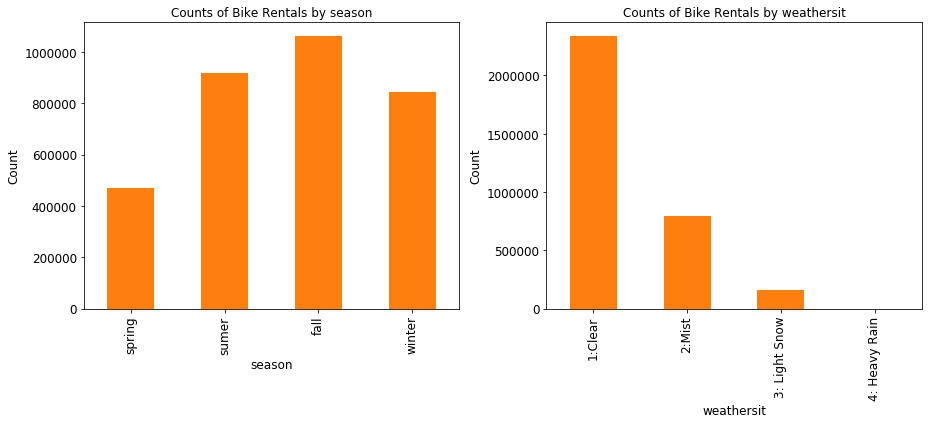

In [10]:
f,(ax1,ax2)= plt.subplots(nrows=1,ncols=2,figsize=(13,6))
ax1 = bikes_hour_df[['season','cnt']].groupby(['season']).sum().reset_index().plot(kind='bar',
                                                                                  legend=False,title="Counts of Bike Rentals by season",
                                                                                  stacked=True,fontsize=12,ax=ax1)
ax1.set_xlabel("season",fontsize=12)
ax1.set_ylabel("Count",fontsize=12)
ax1.set_xticklabels(['spring','sumer','fall','winter'])

ax2 =bikes_hour_df[['weathersit','cnt']].groupby(['weathersit']).sum().reset_index().plot(kind='bar',
                                                                                          legend=False,stacked=True,title="Counts of Bike Rentals by weathersit",
                                                                                          fontsize=12,ax=ax2
                                                                                         )
ax2.set_xlabel("weathersit",fontsize=12)
ax2.set_ylabel("Count",fontsize=12)
ax2.set_xticklabels(['1:Clear','2:Mist','3: Light Snow','4: Heavy Rain'])

f.tight_layout()


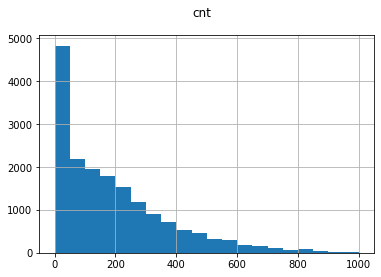

In [11]:
bikes_hour_df['cnt'].hist(bins=20,range=(0,1000)).plot()
plt.suptitle("cnt")
plt.show()

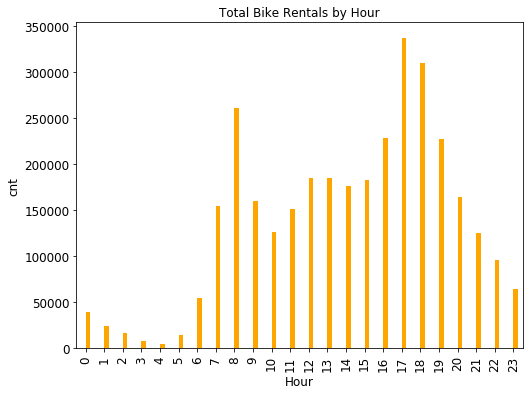

In [12]:
ax =bikes_hour_df[['hr','cnt']].groupby(['hr']).sum().reset_index().plot(
kind='bar',figsize=(8,6),legend=False,title="Total Bike Rentals by Hour", color='orange'
,fontsize=12)
ax.set_xlabel('Hour',fontsize=12)
ax.set_ylabel('cnt',fontsize=12)
plt.show()

In [13]:
bike_df_model_ready = bikes_hour_df.copy()
outcome = 'cnt'

features = [feat for feat in list(bike_df_model_ready) if feat not in [outcome,'instant','dteday']]

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt


In [14]:
X_train,X_test,y_train,y_test = train_test_split(bike_df_model_ready[features],
                                                bike_df_model_ready[['cnt']],
                                                test_size=0.3,random_state=42)
from sklearn import linear_model
model_lr = linear_model.LinearRegression()
model_lr.fit(X_train,y_train)
predictions=model_lr.predict(X_test)
print("Root Mean squared error: %.2f" %sqrt(mean_squared_error(y_test,predictions)))


Root Mean squared error: 143.08


In [15]:
bike_df_model_ready.head() 

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
13085,13086,2012-07-04,3,1,7,10,1,3,0,1,0.80,0.7273,0.46,0.0,447
11451,11452,2012-04-27,2,1,4,8,0,5,1,1,0.40,0.4091,0.50,0.0,592
7162,7163,2011-10-31,4,0,10,1,0,1,1,1,0.26,0.3030,0.81,0.0,13
14242,14243,2012-08-21,3,1,8,15,0,2,1,1,0.76,0.6667,0.37,0.0,302
14495,14496,2012-09-01,3,1,9,4,0,6,0,1,0.70,0.6515,0.70,0.0,12


In [16]:
bikes_df_model_ready=bikes_hour_df.copy()
outcome='cnt'
features= [feat for feat in list(bikes_df_model_ready) if feat not in [outcome,'instant','dteday']]
X_train,X_test,y_rain,y_test = train_test_split(bikes_df_model_ready[features],
                                                bikes_df_model_ready[['cnt']],
                                               test_size=0.3,random_state=42)

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
X_train = poly.fit_transform(X_train)
X_test = poly.fit_transform(X_test)
model_lr=linear_model.LinearRegression()
model_lr.fit(X_train,y_train)
predictions=model_lr.predict(X_test)
print("Root Mean Squared error with PolynomialFeatures set to 2 Degress: %.2f" %sqrt(
mean_squared_error(y_test,predictions)))


Root Mean Squared error with PolynomialFeatures set to 2 Degress: 122.96


In [17]:
bikes_df_model_reay=bikes_hour_df.copy()
outcome='cnt'
features=[feat for feat in list(bikes_df_model_ready) if feat not in [outcome,'instant','dteday']]
X_train,X_test,y_train,y_test= train_test_split(bikes_df_model_ready[features],
                                               bikes_df_model_ready[['cnt']],
                                               test_size=0.3,
                                               random_state=42)
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(3)
X_train = poly.fit_transform(X_train)
X_test = poly.fit_transform(X_test)
from sklearn import linear_model
model_lr = linear_model.LinearRegression()
model_lr.fit(X_train,y_train)
predictions=model_lr.predict(X_test)
print("Root Mean squared error with PolynomialFeatures set to 3 Features :%.2f"
     %sqrt(mean_squared_error(y_test,predictions)))

Root Mean squared error with PolynomialFeatures set to 3 Features :111.65


In [20]:
bikes_df_model_ready=bikes_hour_df.copy()
outcome='cnt'
features=[feat for feat in list(bikes_df_model_ready) if feat not in [outcome,'cnt','dteday']]
X_train,X_test,y_train,y_test= train_test_split(bikes_df_model_ready[features],
                                                bikes_df_model_ready[['cnt']],
                                               test_size=0.3,
                                               random_state=42)
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(4)
X_test = poly.fit_transform(X_test)
X_train  = poly.fit_transform(X_train)
from sklearn import linear_model
model_lr = linear_model.LinearRegression()
model_lr.fit(X_train,y_train)
predictions=model_lr.predict(X_test)
print("Root Mean squared error with PolynomialFeatures set to 4 degree : %.2f"
     %sqrt(mean_squared_error(y_test,predictions)))
                             

Root Mean squared error with PolynomialFeatures set to 4 degree : 112.00


In [27]:
def prepare_data_for_model(raw_dataframe,
                          target_columns,
                          drop_first=False,
                          make_na_col=True):
    #dummy all categorical fields
    dataframe_dummy = pd.get_dummies(raw_dataframe,
                                    columns=target_columns,
                                    drop_first=drop_first,
                                    dummy_na = make_na_col)
    return dataframe_dummy
#make a copy for editing without affecting orginal
bikes_df_model_ready=bikes_hour_df.copy()
bikes_df_model_ready=bikes_df_model_ready.sort_values('instant')

#dummify categorical columns
bike_df_model_ready = prepare_data_for_model(bikes_df_model_ready,
                                            target_columns=['season',
                                                           'weekday',
                                                           'weathersit'],
                                            drop_first=True)

#remove the NaN columns in dataframe as most are outcome variable and we can't use them
bikes_df_model_ready=bike_df_model_ready.dropna()
outcome='cnt'
features = [feat for feat in list(bikes_df_model_ready) if feat not in [outcome,'instant','dteday']]
X_train,X_test,y_train,y_test =train_test_split(bikes_df_model_ready[features],
                                               bikes_df_model_ready['cnt'],
                                               test_size=0.3,
                                               random_state=42)

from sklearn import linear_model
model_lr = linear_model.LinearRegression()

model_lr.fit(X_train,y_train)
predictions=model_lr.predict(X_test)


print('Coefficents:\n',model_lr.coef_)

print("Root Mean squared error :%.2f" %sqrt(mean_squared_error(y_test,predictions)))


Coefficents:
 [ 8.23586919e+01  1.47300653e-01  7.43320540e+00 -1.84968210e+01
  1.02853687e+01  2.42943461e+02  1.19172947e+02 -1.96223591e+02
  3.06539762e+01  2.15667880e+01 -3.66672367e+00  6.52432601e+01
  2.48689958e-14 -5.57365085e+00 -9.73459869e-01  1.43638382e+00
 -4.69458533e+00  1.59385993e+00  1.15050328e+01  1.06581410e-14
  8.45881116e+00 -2.46073507e+01  4.23349860e+01  0.00000000e+00]
Root Mean squared error :137.83


In [35]:
bikes_df_model_ready[['weathersit_2.0',
                     'weathersit_3.0',
                     'weathersit_4.0']].head()

,weathersit_2.0,weathersit_3.0,weathersit_4.0
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [40]:
#prior hours
bikes_hour_df_shift=bikes_hour_df[['dteday','hr','cnt']].groupby(['dteday','hr']).sum().reset_index()
bikes_hour_df_shift.sort_values(['dteday','hr'])
#shift the count of the last two hours forward so the new count can take in consideration how the last tow hours went
bikes_hour_df_shift['sum_hr_shift_1'] = bikes_hour_df_shift.cnt.shift(+1)
bikes_hour_df_shift['sum_hr_shift_2'] = bikes_hour_df_shift.cnt.shift(+2)

bike_df_model_ready = pd.merge(bikes_hour_df,bikes_hour_df_shift[['dteday',
                                                                  'hr',
                                                                  'sum_hr_shift_1',
                                                                  'sum_hr_shift_2']],how='inner',on=['dteday','hr'])

#drop Nas caused by our shifting fields around
bike_df_model_ready = bike_df_model_ready.dropna()

outcome='cnt'
features = [feat for feat in list(bike_df_model_ready) if feat not in [outcome,'instant','dteday','casual','registered']]

#split data into train and test portitions and models
X_train,X_test,y_train,y_test= train_test_split(bike_df_model_ready[features],
                                               bike_df_model_ready[['cnt']],
                                               test_size=0.3,
                                               random_state=42)
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
model_gbr = GradientBoostingRegressor()
model_gbr.fit(X_train,np.ravel(y_train))




predictions=model_gbr.predict(X_test)
print("Root Mean Squared error :%.2f " %sqrt(mean_squared_error(y_test,predictions)))

Root Mean Squared error :44.43 


In [41]:
np.mean(bikes_hour_df_shift['sum_hr_shift_1'])

189.47117044539073

In [42]:
bikes_hour_df_shift['sum_hr_shift_1'].describe()

count    17378.000000
mean       189.471170
std        181.389688
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: sum_hr_shift_1, dtype: float64

In [47]:
features = ['hr','season','holiday','temp']
from sklearn import linear_model
from sklearn.metrics import r2_score
#split data into trian and test portions and model
X_train,X_test,y_train,y_test = train_test_split(bike_df_model_ready[features],
                                                bike_df_model_ready[['cnt']],
                                                test_size=0.3,
                                                random_state=42)
for feat in features:
    model_lr = linear_model.LinearRegression()
    model_lr.fit(X_train[[feat]],y_train)
    predictions=model_lr.predict(X_test[[feat]])
    print("R^2 %s for %f " %(feat,r2_score(y_test,predictions)))



R^2 hr for 0.160161 
R^2 season for 0.034888 
R^2 holiday for -0.001098 
R^2 temp for 0.154656 


In [50]:
#simple approach - make a copy fo rediting without affecting orginal
bike_df_model_ready = bikes_hour_df[['hr','season','holiday','temp','cnt']].copy()
outcome ='cnt'
bike_df_model_ready=prepare_data_for_model(bike_df_model_ready,
                                          drop_first=False,
                                          make_na_col = False,
                                          target_columns = ['season'])
features = [feat for feat in bike_df_model_ready if feat not in ['cnt']]
X_train,X_test,y_train,y_test = train_test_split(bike_df_model_ready[features],
                                                bike_df_model_ready[['cnt']],
                                                test_size=0.3,
                                                random_state=42)
from sklearn import linear_model
for feat in features:
    model_lr = linear_model.LinearRegression()
    model_lr.fit(X_train[[feat]],y_train)
    predictions=model_lr.predict(X_test[[feat]])
    print("R^2 for %s is %f" %(feat,r2_score(y_test,predictions)))

R^2 for hr is 0.156594
R^2 for holiday is 0.001258
R^2 for temp is 0.154471
R^2 for season_1 is 0.053717
R^2 for season_2 is 0.003657
R^2 for season_3 is 0.016976
R^2 for season_4 is 0.001111


In [53]:
model_lr.fit(X_train,y_train)
predictions=model_lr.predict(X_test)
print("Root Mean squared error : %.2f \n" %(sqrt(mean_squared_error(y_test,predictions))))
print("Intercept: %f"%(model_lr.intercept_))

features_coefficients = pd.DataFrame({'coefficients':model_lr.coef_[0],
                                     'features':X_train.columns.values})
features_coefficients.sort_values('coefficients')


Root Mean squared error : 153.20 

Intercept: -121.029547


,coefficients,features
5,-41.245562,season_3
1,-23.426176,holiday
4,-1.624812,season_2
3,3.861149,season_1
0,8.631624,hr
6,39.009224,season_4
2,426.900259,temp


In [56]:
INTERCEPT = -121.029547
COEF_HOLIDAY=-23.426176
COEF_HOUR   = 8.631624
COEF_SEASON_1=3.861149
COEF_SEASON_2=-1.624812
COEF_SEASON_3=-41.245562
COEF_SEASON_4=39.009224
COEF_TEMP=426.900259  

In [57]:
X_train['temp'].describe()

count    12165.000000
mean         0.496737
std          0.192281
min          0.020000
25%          0.340000
50%          0.500000
75%          0.660000
max          1.000000
Name: temp, dtype: float64

In [58]:
MEAN_HOLIDAY = 0.0275
MEAN_HOUR = 11.6
MEAN_SEASON_1 = 1
MEAN_SEASON_2 = 0
MEAN_SEASON_3 = 0
MEAN_SEASON_4 = 0
MEAN_TEMP = 0.4967

rental_counts = INTERCEPT \
                + (MEAN_HOLIDAY * COEF_HOLIDAY) \
                + (9 * COEF_HOUR)\
                + (MEAN_SEASON_1 * COEF_SEASON_1) + (MEAN_SEASON_2 * COEF_SEASON_2)\
                + (MEAN_SEASON_2 * COEF_SEASON_2) + (MEAN_SEASON_3 * COEF_SEASON_4)\
                + (MEAN_TEMP * COEF_TEMP)
print("Estimated bike rental count for selected parameters: %i" %int(rental_counts))

Estimated bike rental count for selected parameters: 171
